In [3]:
    # !pip install transformers
    # !pip install gradio
    # !pip install timm
    # !pip install inflect
    # !pip install phonemizer
#https://huggingface.co/facebook/detr-resnet-50

In [1]:
from transformers import pipeline

/Users/anoopmishra/Repositories/anoop/HuggingFace/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from transformers.utils import logging
logging.set_verbosity_error()



In [3]:
od_pipe = pipeline(task="object-detection", model="facebook/detr-resnet-50")

/Users/anoopmishra/Repositories/anoop/HuggingFace/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:2409: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/Users/anoopmishra/Repositories/anoop/HuggingFace/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:2409: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/Users/anoopmishra/Repositories/anoop/HuggingFace/.venv/lib/python3.13/site-packages/torch/nn/modules/module.py:2409: UserWarning: for bn1.bia

In [4]:
from PIL import Image

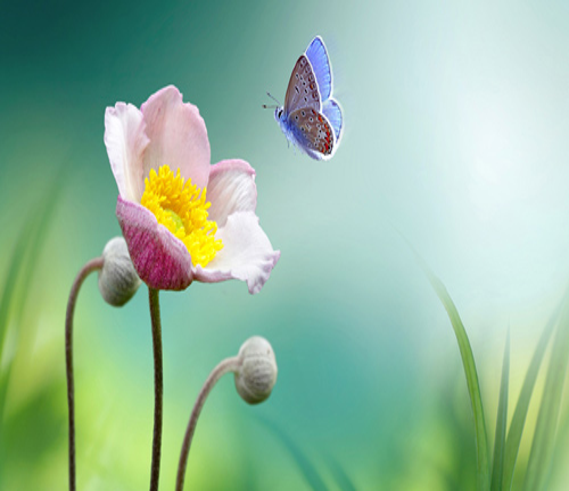

In [5]:
raw_image = Image.open('spring-images-min.jpg')
raw_image.resize((569, 491))

In [6]:
pipeline_output = od_pipe(raw_image)

In [7]:
# Using Gradio as a Simple interface
import gradio as gr
import os

In [9]:
from helper import load_image_from_url, render_results_in_image

In [11]:
def get_prediction(image):
    output = od_pipe(image)
    
    processed_image = render_results_in_image(image,
                                            output)
    return processed_image

In [12]:
demo = gr.Interface(
  fn=get_prediction,
  inputs=gr.Image(label="Input image", 
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [14]:
demo.launch(share=True, server_port=int("8080"))

* Running on local URL:  http://127.0.0.1:8080
* Running on public URL: https://980ff17deca18116ae.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Created dataset file at: .gradio/flagged/dataset1.csv


In [15]:
demo.close()

Closing server running on port: 8080
